# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2: Линейные модели


**Общая информация**

**Срок сдачи:** 25 апреля 18:00 Сдача **очная** на онлайн занятии.


Используйте данный Ipython Notebook при оформлении домашнего задания.

Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0422, Задание 2] Фамилия Имя.



**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

***Ваше решение здесь*** 

$$ w_{new} = w_{old} - \alpha \cdot \nabla_{w}L^{*}(w)$$

$$ \nabla_{w}L^{*}(w) = \frac{\sum\limits_{i = 1}^{n} \nabla_{w} L(w_{old}, x_{j_i}, y_{j_i})}{n}$$

$$ \nabla_{w} L(w_{old}, x_{j_i}, y_{j_i}) = \nabla_{w} \left( (y_{j_i} - \langle x_{j_i}, w_{old} \rangle)^{2} + \frac{1}{C} \| w_{old} \|_{2} \right) = 2 \cdot \left( (\langle x_{j_i}, w_{old} \rangle - y_{j_i}) \cdot x_{j_i} + \frac{w_{old}}{C} \right)$$

где $\alpha$ - learning rate / длина шага оптимизации (может быть задана как невозрастающая функция $f(k)$, где $k$ - номер шага оптимизации)

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

***Ваше решение здесь*** 

$$ w_{new} = w_{old} - \alpha \cdot \nabla_{w}L^{*}(w_{old})$$

$$ \nabla_{w} L^{*}(w_{old}) = \frac{\sum\limits_{i = 1}^{n} \nabla_{w} L(w_{old}, x_{j_i}, y_{j_i})}{n} $$

\begin{gather*}
\nabla_{w} L(w_{old}, x_{j_i}, y_{j_i}) = \nabla_{w} \left( -y_{j_i} \cdot \log_2(a(x_{j_i}, w_{old}) - (1 - y_{j_i}) \cdot \log_2(1 - a(x_{j_i}, w_{old})) + \frac{1}{C} \| w_{old} \| \right) = \\ 
= \frac{1}{\ln(2)} (a(x_{j_i}, w_{old}) - y_{j_i}) \cdot x_{j_i} + \frac{2}{C} \| w_{old} \|
\end{gather*}

$$ \nabla_{w} L^{*}(w_{old}) = \frac{1}{n \ln(2)} \sum\limits_{i = 1}^{n} (\frac{1}{1 + \exp(- \langle x_{j_i}, w_{old} \rangle)} - y_{j_i}) + \frac{2}{C} w_{old} $$

Итого, общая формула для двух алгоритмов имеет вид:

$$ w_{new} = w_{old} - \alpha \cdot (\frac{1}{n} \cdot \sum_{i = 1}^{n} (a(x_{j_i}, w_{old}) - y_{j_i}) \cdot x_{j_i} + \frac{w_{old}}{C})$$ (константы убраны, так как не влияют на сходимость)

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

***Ваше решение здесь*** 

Гессиан: 
$$ H(f(w)) =
 \begin{pmatrix}
  \frac{\partial^{2} f}{\partial w_{0}^{2}} & \frac{\partial^{2} f}{\partial w_{0} \partial w_{1}} & \cdots & \frac{\partial^{2} f}{\partial w_{0} \partial w_{D}} \\
  \frac{\partial^{2} f}{\partial w_{1} \partial w_{0}} & \frac{\partial^{2} f}{\partial w_{0}^{1}} & \cdots & \frac{\partial^{2} f}{\partial w_{1} \partial w_{D}} \\
  \vdots  & \vdots  &  \frac{\partial^{2} f}{\partial w_{i} \partial w_{j}} & \vdots  \\
  \frac{\partial^{2} f}{\partial w_{D} \partial w_{0}} & \frac{\partial^{2} f}{\partial w_{D} \partial w_{1}} & \cdots & \frac{\partial^{2} f}{\partial w_{D}^{2}} 
 \end{pmatrix}$$
 В нашем случае $f(w) = \frac{1}{n} \cdot (w^{T} \cdot X^{T} \cdot X \cdot w - w^{T} \cdot X^{T} \cdot y - y^{T} \cdot X \cdot w + y^{T} \cdot y)$
 
 Далее деление на $n$ можно опустить, так как мы ищем минимум функции, а умножение на константу на это не влияет.
 
 Тогда:
 $$ H(f(w)) = \frac{2}{n} \cdot 
 \begin{pmatrix}
  x_{0}^{T}x_{0} & x_{0}^{T}x_{1} & \cdots & x_{0}^{T}x_{D} \\
  x_{1}^{T}x_{0} & x_{1}^{T}x_{1} & \cdots & x_{1}^{T}x_{D} \\
  \vdots  & \vdots  & x_{i}^{T}x_{j} & \vdots  \\
  x_{D}^{T}x_{0} & x_{D}^{T}x_{1} & \cdots & x_{D}^{T}x_{D}
 \end{pmatrix}$$
 
Получается, что $ H(f(w)) = \frac{2}{n} \cdot  X^{T} \cdot X \implies \exists A = \sqrt{2} X: A^{T} \cdot A = H(f(w))$. При этом X не вырождена, так как имеет строк не меньше, чем столбцов и полный ранг. Значит, $H(f(w))$ положительно определена. 
 
Для L2 регуляризации: 
$$f(w) = \frac{1}{n} \cdot (w^{T} \cdot X^{T} \cdot X \cdot w - w^{T} \cdot X^{T} \cdot y - y^{T} \cdot X \cdot w + y^{T} \cdot y) + \frac{1}{C} \cdot w^{T} \cdot w$$
$$ \nabla_{w}f(w) = 2 \cdot X^{T} \cdot X \cdot w - 2 \cdot X^{T} \cdot y + \frac{2}{C} \cdot E \cdot w $$
$$ \nabla_{w} f(w) = 0 \iff w = (X^{T} \cdot X + \frac{1}{C} E)^{-1} \cdot X^{T} \cdot y $$

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

Итак, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор: он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определению мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

***Ваше решение здесь*** 

$$\frac{d}{d a(x_i)} \mathbb{E}(L \mid x_i) = \frac{1}{\ln(2)} \cdot \left( \frac{-p(y_i = 1 \mid x_i)}{a(x_i)} + \frac{p(y_i = 0 \mid x_i)}{1 - a(x_i)} \right)$$

Воспользуемся тем, что $p(y_i = 1 \mid x_i) + p(y_i = 0 \mid x_i) = 1$

$$\frac{d}{da(x_i)} \mathbb{E}(L \mid x_i) = \frac{a(x_i) - p(y_i = 1 \mid x_i)}{\ln (2) \cdot a(x_i) \cdot (1 - a(x_i))}$$

$$ \frac{d}{da(x_i)} \mathbb{E}(L \mid x_i) = 0 \iff \begin{cases} a(x_i) \neq 0, \\ a(x_i) \neq 1, \\ a(x_i) = p(y_i = 1 \mid x_i) \end{cases} $$

Очевидно, $a(x_i) = p(y_i = 1 \mid x_i)$ - точка минимума мат. ожидания.

Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

***Ваше решение здесь*** 

Мы вводим $w_{0}$, чтобы задать значение предсказания в случае, когда все признаки равны нулю или близки к нему. Такой объект не обязательно имеет целевую переменную 0 (в случае линейной регрессии) или имеет равную вероятность принадлежности обоим классам (в случае логистической регрессии). Также $w_0$ отвечает за удаление гиперплоскости от начала координат и если регуляризовывать все веса, кроме $w_{0}$, то он получится в разы больше остальных и, скорее всего, разделяющая гиперплоскость будет расположена неадекватно. Да, нужно.

#  Реализация линейной модели (4 балла)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать с диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [174]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [175]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [176]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [177]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [351]:
def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
    
    X = np.array(X)
    y = np.array(y)
    
    if shuffle == True:
        sample_indices = np.array(range(y.size))
        
        while batch_size < sample_indices.size:
            # случайная выборка уникальных значений из заданного массива индексов объектов выборки
            batch_indices = np.random.choice(np.arange(sample_indices.size), 
                                             size=batch_size,
                                             replace=False)
            batch = sample_indices[batch_indices]
            sample_indices = np.delete(sample_indices, batch_indices)
            
            yield(X[batch], y[batch])
            
        yield(X[sample_indices], y[sample_indices])
    
    else:
        begin_index = 0
        end_index = batch.size
        
        while end_index < y.size:
            yield(X[begin_index : end_index], y[begin_index : end_index])
            
            begin_index += batch_size
            end_index += batch_size
        
        yield(X[begin_index::], y[begin_index::])
        

In [353]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
b = np.array([1, 2, 3])
res = np.dot(A, b)
print(res)
print(res.reshape(1, -1).ravel())
print(A.shape, b.shape, res.shape)

[14 32 50]
[14 32 50]
(3, 3) (3,) (3,)


In [354]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.linear_model import LinearRegression, SGDClassifier

In [355]:
def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """
    
    if x > 20:
        return 1.0
    
    if x < -20:
        return 0.0
    
    sigm_value_x = 1 / (1 + np.exp(-x))

    return sigm_value_x

In [356]:
def my_log2(x):
    
    if np.allclose(x, 0.0):
        return -1.0e+70

    return np.log2(x)

In [446]:
# %%pycodestyle

class MySGDClassifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self, batch_generator, C=1, alpha=0.01, max_epoch=10, batch_size=1, border=0.5, model_type='lin_reg'):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """
        
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.batch_size = batch_size
        self.border = border
        self.errors_log = {'iter' : [], 'loss' : []}  
        self.model_type = model_type
        
    
    def add_dummy_feature(self, X):
        
        add_clm = np.array([1] * (X.shape[0]))
        add_clm = add_clm.reshape(-1, 1)
        return np.hstack((add_clm, X))
    
    
    def calc_reg(self, w):
        
        reg = np.sum(w ** 2) / self.C
        return reg
    
    
    def calc_reg_deriv(self, w):
        
        res = 2 * w / self.C
        return res
        
        
    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу 
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудьте тип модели (линейная или логистическая регрессия)!
        """
        
        X = np.array(X_batch)
        y = np.array(y_batch)
        w = np.array(self.weights)
        
        # создаём фиктивный признак из '1'
        X = self.add_dummy_feature(X)
    
        loss = np.dot(X, w.T)
        
        if self.model_type == 'lin_reg':
            loss = (loss - y) ** 2
            loss = np.sum(loss)
            
        elif self.model_type == 'log_reg':
            loss = np.array(list(map(sigmoid, loss)))
            
            loss_one = loss[np.where(y == 1)]
            loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
            
            loss_zero = 1 - loss[np.where(y == 0)]
            loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
            
            loss = -(loss_zero + loss_one)

        else:
            raise ValueError('Incorrect model type!')
        
        loss /= y.size
        
        # reg = w ** 2
        # reg = reg.sum()
        # reg /= self.C
        
        loss += self.calc_reg(w)
        
        return loss
        
    
    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то, что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудьте тип модели (линейная или логистическая регрессия)!
        """
        
        X = np.array(X_batch)
        # создаём фиктивный признак их '1'
        X = self.add_dummy_feature(X)
        
        y = np.array(y_batch).reshape(1, -1)
        w = np.array(self.weights).reshape(1, -1)
        
        # print(X)
        # print(w)
        a = np.dot(X, w.ravel())
        # print(a)
        
        if self.model_type == 'log_reg':
            a = np.array(list(map(sigmoid, a)))
            
        a = a - y
        a = a.reshape(-1, 1)
        
        loss_grad = X * a
        loss_grad = loss_grad.mean(axis=0)
        
        reg = self.calc_reg_deriv(w)
        
        if self.model_type == 'log_reg':
            loss_grad = loss_grad / np.log(2)
            
        loss_grad = loss_grad + reg
        
        return loss_grad
    
    
    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        
        self.weights = self.weights - new_grad * self.alpha
        
    
    def fit(self, X, y):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''
        
        X = np.array(X)
        y = np.array(y)
        
        # Нужно инициализровать случайно веса
        np.random.seed(0)
        self.weights = np.random.randint(1, 100, size=(X.shape[1] + 1))
        self.weights = self.weights.astype(float)
        
        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(X, y, shuffle=True, batch_size=self.batch_size)
            
            for batch_num, new_batch in enumerate(new_epoch_generator):
                
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                batch_loss = self.calc_loss(X_batch, y_batch)
                self.update_weights(batch_grad)
                
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)
                # print(batch_loss)
                
                
        batch_loss = self.calc_loss(X, y)
        self.errors_log['loss'].append(batch_loss)
        # print(batch_loss)
        
        return self
    
        
    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудьте тип модели (линейная или логистическая регрессия)!
        '''
        
        X1 = np.array(X)
        # добавим фиктивный признак из '1'
        X1 = self.add_dummy_feature(X1)
        
        w = np.array(self.weights)
        y_pred = np.dot(X1, w.T)
        
        if self.model_type == 'log_reg':
            y_pred = np.array(list(map(sigmoid, y_pred)))
            y_pred = (y_pred >= self.border).astype(int) 
        
        return y_pred

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [358]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])

gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
print(X.shape)
y = np.r_[np.ones(200), np.zeros(200)] # соединить последовательности

(400, 2)


In [359]:
my_clf_lin_reg = MySGDClassifier(batch_generator, model_type='lin_reg')
my_clf_lin_reg.fit(X, y)
print(my_clf_lin_reg.weights)

[ 0.02409155  0.11828265 -0.11310624]


In [360]:
clf_lin_reg = LinearRegression()
clf_lin_reg.fit(X, y)
print(clf_lin_reg.coef_)

[ 0.14354486 -0.17043888]


In [361]:
def plot_decision_boundary(clf):
    
    x = np.linspace(-50, 50)
    y = (clf.weights[0] + clf.weights[1] * x) / (-clf.weights[2])
    line, = plt.plot(x, y, '-g', label='My SGD')
    
    return line

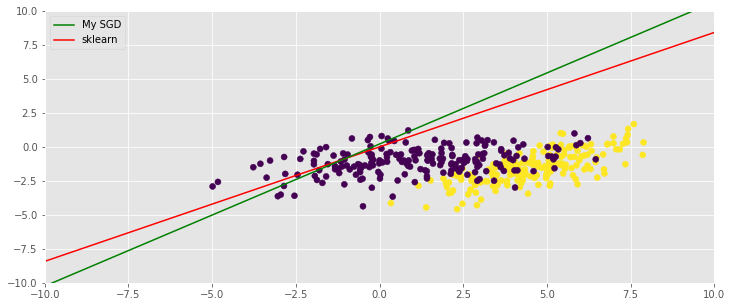

In [362]:
x = np.linspace(-50, 50)
k = ((clf_lin_reg.coef_[0]) * x) / (-clf_lin_reg.coef_[1])

line2, = plt.plot(x, k, '-r', label='sklearn')

line1 = plot_decision_boundary(my_clf_lin_reg)

plt.legend(handles=[line1, line2])
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [363]:
my_clf_log_reg = MySGDClassifier(batch_generator, model_type='log_reg', alpha=0.05, batch_size=1)
my_clf_log_reg.fit(X, y)
print(my_clf_log_reg.weights)

[-0.08130203  0.23897376 -0.13565709]


In [364]:
clf_log_reg = SGDClassifier(loss='log', alpha=1, learning_rate='constant', eta0=0.05) # alpha = 1 / C
clf_log_reg.fit(X, y)
print(clf_log_reg.coef_)

[[ 0.24708663 -0.09106563]]


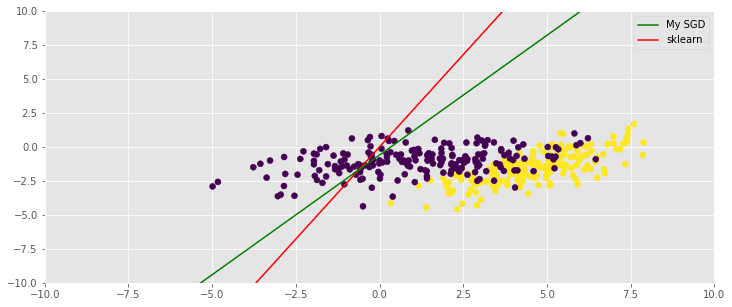

In [365]:
x = np.linspace(-50, 50)
k = ((clf_log_reg.coef_[0][0]) * x) / (-clf_log_reg.coef_[0][1])

line2, = plt.plot(x, k, '-r', label='sklearn')

line1 = plot_decision_boundary(my_clf_log_reg)

plt.legend(handles=[line1, line2])
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [366]:
from sklearn.datasets import make_classification

In [367]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)
X.shape

(100000, 10)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

alpha = 0.01
   N = 10
      lin_reg_mean_loss = 63919.50152165098
   N = 50
      lin_reg_mean_loss = 26151.85707647729
   N = 100
      lin_reg_mean_loss = 13622.6386685414
   N = 500
      lin_reg_mean_loss = 2729.916473417504
   N = 1000
      lin_reg_mean_loss = 1365.0733217947313
   N = 10000
      lin_reg_mean_loss = 273.1443322337271
   N = 100000
      lin_reg_mean_loss = 273.1443322337271
alpha = 0.02
   N = 10
      lin_reg_mean_loss = 50048.32399786294
   N = 50
      lin_reg_mean_loss = 13838.437134941543
   N = 100
      lin_reg_mean_loss = 6930.7400232208865
   N = 500
      lin_reg_mean_loss = 1386.3369111967431
   N = 1000
      lin_reg_mean_loss = 693.2835728610487
   N = 10000
      lin_reg_mean_loss = 138.81331191554438
   N = 100000
      lin_reg_mean_loss = 138.81331191554438
alpha = 0.04
   N = 10
      lin_reg_mean_loss = 33179.71522444254
   N = 50
      lin_reg_mean_loss = 7146.011533739583
   N = 100
      lin_reg_mean_loss = 3573.1249772859883
   N = 500
   

/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/4122523773.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/4122523773.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(self.weights ** 2) / self.C
/usr/local/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


   N = 10
      lin_reg_mean_loss = 1369251.3346029571
   N = 50
      lin_reg_mean_loss = 1.5904387631420527e+23
   N = 100
      lin_reg_mean_loss = 5.4678674903365046e+45
   N = 500
      lin_reg_mean_loss = 3.288236547544375e+227
   N = 1000
      lin_reg_mean_loss = inf
   N = 10000
      lin_reg_mean_loss = nan
   N = 100000
      lin_reg_mean_loss = nan
alpha = 0.5


/usr/local/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


   N = 10
      lin_reg_mean_loss = 312914117.26832217
   N = 50
      lin_reg_mean_loss = 1.8585901689869007e+37
   N = 100
      lin_reg_mean_loss = 2.5590907646730287e+74
   N = 500
      lin_reg_mean_loss = inf
   N = 1000
      lin_reg_mean_loss = nan
   N = 10000
      lin_reg_mean_loss = nan
   N = 100000
      lin_reg_mean_loss = nan


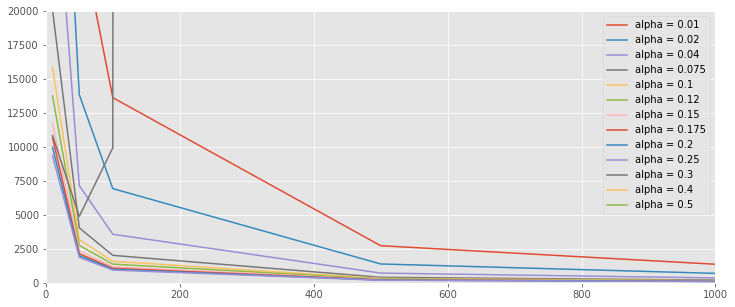

In [368]:
alpha_grid = np.array([0.01, 0.02, 0.04, 0.075, 0.1, 0.12, 0.15, 0.175, 0.2, 0.25, 0.3, 0.4, 0.5])
N_grid = [10, 50, 100, 500, 1000, 10000, 100000]

lin_reg_lines = []

for alpha in alpha_grid:
    print('alpha =', alpha)
    
    lin_reg_clf = MySGDClassifier(batch_generator, model_type='lin_reg', alpha=alpha, max_epoch=5, batch_size=100)
    lin_reg_clf.fit(X, y)
    
    lin_reg_mean_loss = []
    
    for N in N_grid:
        print('   N =', N)
        cur_lin_reg_mean_loss = np.mean(lin_reg_clf.errors_log['loss'][:N])
        print('      lin_reg_mean_loss =', cur_lin_reg_mean_loss)
        lin_reg_mean_loss.append(cur_lin_reg_mean_loss)
    
    label_str = 'alpha = ' + str(alpha)
    
    lin_reg_line, = plt.plot(N_grid, lin_reg_mean_loss, label=label_str)
    
    lin_reg_lines.append(lin_reg_line)
    
plt.xlim(0, 1000)
plt.ylim(0, 20000)

plt.legend(handles=lines)
plt.show()

alpha = 0.01
   N = 10
      log_reg_mean_loss = 4.5700000000000004e+69
   N = 50
      log_reg_mean_loss = 4.338e+69
   N = 100
      log_reg_mean_loss = 3.821e+69
   N = 500
      log_reg_mean_loss = 8.954e+68
   N = 1000
      log_reg_mean_loss = 4.477e+68
   N = 10000
      log_reg_mean_loss = 8.952209558088382e+67
   N = 100000
      log_reg_mean_loss = 8.952209558088382e+67
alpha = 0.02
   N = 10
      log_reg_mean_loss = 4.5500000000000005e+69
   N = 50
      log_reg_mean_loss = 3.856000000000001e+69
   N = 100
      log_reg_mean_loss = 2.231e+69
   N = 500
      log_reg_mean_loss = 4.461999999999999e+68
   N = 1000
      log_reg_mean_loss = 2.2309999999999997e+68
   N = 10000
      log_reg_mean_loss = 4.461107778444311e+67
   N = 100000
      log_reg_mean_loss = 4.461107778444311e+67
alpha = 0.04
   N = 10
      log_reg_mean_loss = 4.470000000000001e+69
   N = 50
      log_reg_mean_loss = 2.1900000000000002e+69
   N = 100
      log_reg_mean_loss = 1.0950000000000001e+69
   N = 

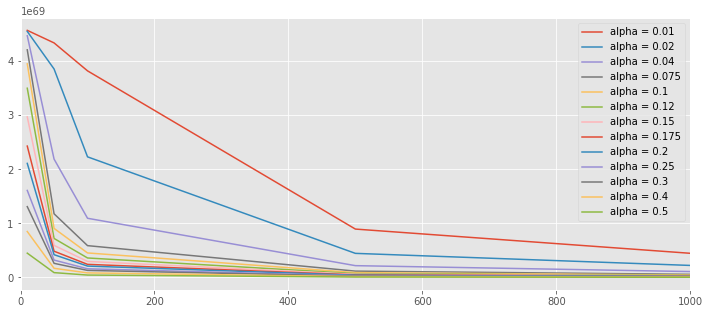

In [369]:
alpha_grid = np.array([0.01, 0.02, 0.04, 0.075, 0.1, 0.12, 0.15, 0.175, 0.2, 0.25, 0.3, 0.4, 0.5])
N_grid = [10, 50, 100, 500, 1000, 10000, 100000]

log_reg_lines = []

for alpha in alpha_grid:
    print('alpha =', alpha)
    
    log_reg_clf = MySGDClassifier(batch_generator, model_type='log_reg', alpha=alpha, max_epoch=5, batch_size=100)
    log_reg_clf.fit(X,y)
    
    log_reg_mean_loss = []
    
    for N in N_grid:
        print('   N =', N)
        cur_log_reg_mean_loss = np.mean(log_reg_clf.errors_log['loss'][:N])
        print('      log_reg_mean_loss =', cur_log_reg_mean_loss)
        log_reg_mean_loss.append(cur_log_reg_mean_loss)
    
    label_str = 'alpha = ' + str(alpha)
    
    log_reg_line, = plt.plot(N_grid, log_reg_mean_loss, label=label_str)
    
    log_reg_lines.append(log_reg_line)
    
plt.xlim(0, 1000)

plt.legend(handles=lines)
plt.show()

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

[1.00000000e+03 2.15443469e+02 4.64158883e+01 1.00000000e+01
 2.15443469e+00 4.64158883e-01 1.00000000e-01 2.15443469e-02
 4.64158883e-03 1.00000000e-03]
0.034140663330874337
0.034408930811637504
0.03527066665780138
0.03533127035404687
0.02598904431794998
0.009850995715025603
0.00213208386596131
0.00048759513380084574


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/4122523773.py:84: RuntimeWarning: overflow encountered in double_scalars
  loss += self.calc_reg()
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/4122523773.py:33: RuntimeWarning: overflow encountered in double_scalars
  reg = np.sum(self.weights ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/4122523773.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/4122523773.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(self.weights ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/4122523773.py:39: RuntimeWarning: overflow encountered in true_divide
  res = 2 * self.weights / self.C


nan
nan


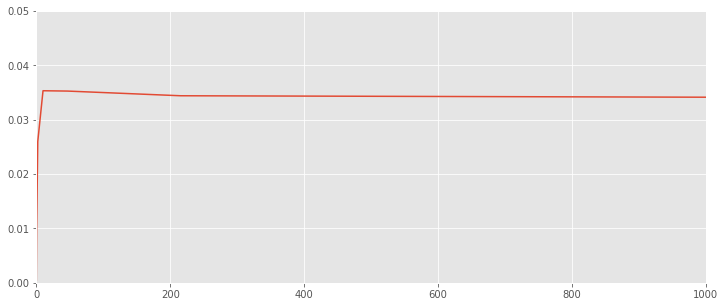

In [370]:
C_grid = np.logspace(3, -3, 10)
print(C_grid)
mean_weights = []

for C in C_grid:
    mean_weight = np.mean(
        MySGDClassifier(batch_generator, 
                        model_type='lin_reg', 
                        C=C, 
                        max_epoch=5, 
                        batch_size=100).fit(X, y).weights)
    mean_weights.append(mean_weight)
    print(mean_weight)

plt.plot(C_grid, mean_weights)
plt.xlim(0, max(C_grid))
plt.ylim(0, 0.05)
plt.show()

[1.00000000e+03 2.15443469e+02 4.64158883e+01 1.00000000e+01
 2.15443469e+00 4.64158883e-01 1.00000000e-01 2.15443469e-02
 4.64158883e-03 1.00000000e-03]
39.52107734616295
26.204787743832426
3.2943322964743085
-0.03933365646946693
-0.026480898661439208
-0.011228403780914742
-0.0032272618636249566
-0.0007057908578687752


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/4122523773.py:33: RuntimeWarning: overflow encountered in double_scalars
  reg = np.sum(self.weights ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/4122523773.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(self.weights ** 2) / self.C
/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/4122523773.py:39: RuntimeWarning: overflow encountered in true_divide
  res = 2 * self.weights / self.C


nan
nan


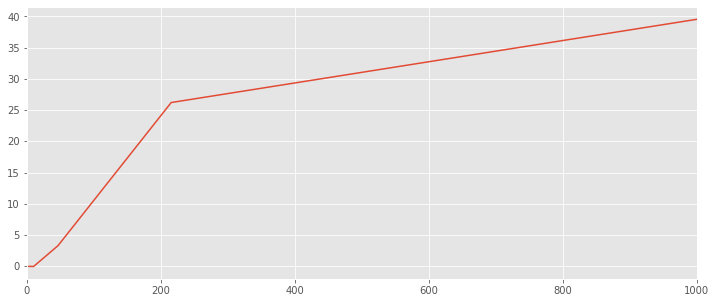

In [371]:
C_grid = np.logspace(3, -3, 10)
print(C_grid)
mean_weights = []

for C in C_grid:
    mean_weight = np.mean(
        MySGDClassifier(batch_generator, 
                        model_type='log_reg', 
                        C=C, 
                        max_epoch=5, 
                        batch_size=100).fit(X, y).weights
    )
    mean_weights.append(mean_weight)
    print(mean_weight)
    
plt.plot(C_grid, mean_weights)
plt.xlim(0, max(C_grid))
plt.show()

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

# Боевое применение (4  балла)

**Защита данной части возможна только при преодолении в проекте бейзлайна Handmade baseline.**

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [408]:
doc_to_title = {}
with open('docs_titles.tsv') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
        
print (len(doc_to_title))


28026


In [409]:
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}

for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [410]:
y_train = []
X_train = []
groups_train = []

for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15])
        
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)

print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [411]:
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

In [412]:
ss = StandardScaler()
X = ss.fit_transform(X_train, y_train)

In [378]:
def find_best_batch_size(X, y, model_type, batch_sizes):
    
    loss = []
    
    for batch_size in batch_sizes:
    
        my_clf = MySGDClassifier(batch_generator,
                                 model_type=model_type, 
                                 batch_size=batch_size).fit(X, y)
        loss.append(my_clf.errors_log['loss'][-1])
        
    best_batch_size = batch_sizes[np.argmin(loss)]
    
    return (best_batch_size, loss)


In [379]:
batch_sizes = [10, 50, 100, 200, 300, 500, 1000]

(best_lin_reg_batch_size, lin_reg_loss) = find_best_batch_size(X, y_train, 'lin_reg', batch_sizes)
(best_log_reg_batch_size, log_reg_loss) = find_best_batch_size(X, y_train, 'log_reg', batch_sizes)

print(best_lin_reg_batch_size)
print(lin_reg_loss)
print(best_log_reg_batch_size)
print(log_reg_loss)

200
[0.2059004658703477, 0.20565272764338782, 0.20557909276458378, 0.20556159777154245, 0.20738203143953204, 0.7600136869475971, 78.62968790807354]
100
[0.87855356337424, 0.8763129414283779, 0.8762758860976567, 0.8763574312269429, 0.8779480372009975, 1.2831479897348163e+67, 1.8366124893071005e+69]


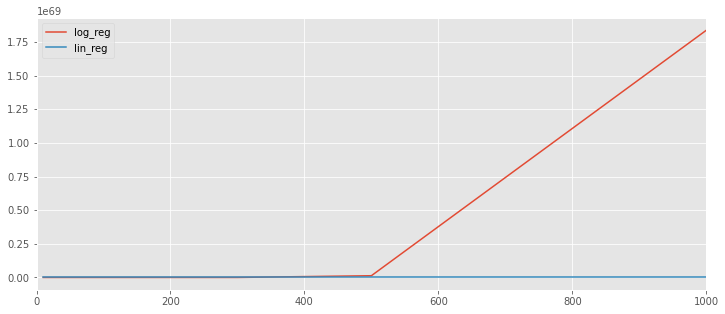

In [380]:
line1, = plt.plot(batch_sizes, log_reg_loss, label='log_reg')
line2, = plt.plot(batch_sizes, lin_reg_loss, label='lin_reg')
plt.legend(handles=[line1, line2])
plt.xlim(0, max(batch_sizes))
plt.show()

In [381]:
# уточним лучший параметр batch_size

lin_reg_batch_sizes = range(100, 300, 10)
log_reg_batch_sizes = range(10, 200, 10)

(best_lin_reg_batch_size, lin_reg_loss) = find_best_batch_size(X, y_train, 'lin_reg', lin_reg_batch_sizes)
(best_log_reg_batch_size, log_reg_loss) = find_best_batch_size(X, y_train, 'log_reg', log_reg_batch_sizes)

print(best_lin_reg_batch_size)
print(lin_reg_loss)
print(best_log_reg_batch_size)
print(log_reg_loss)

200
[0.20557909276458378, 0.20773485040339135, 0.2066326249107564, 0.20570617613632114, 0.2067593856734869, 0.20614726445980763, 0.20604784423361697, 0.20598777601334947, 0.20583987994519098, 0.20564744431555637, 0.20556159777154245, 0.2056128411372529, 0.20573962673474366, 0.20659213642561783, 0.20584334193820622, 0.20591124950174763, 0.20588326059635692, 0.20588196509456308, 0.2059125125843728, 0.20640986722451107]
180
[0.87855356337424, 0.8789563205607547, 0.877752064121472, 0.876380839212673, 0.8763129414283779, 0.8764283337523808, 0.8763527070395434, 0.8770578145664097, 0.8763096482019187, 0.8762758860976567, 0.8764229501695322, 0.8763149991940964, 0.8765818426364805, 0.8763235346191784, 0.8763006669064495, 0.8762854644229917, 0.876286933211377, 0.8762733803425664, 0.8763365358452136]


In [382]:
# ещё уточним лучший параметр batch_size

lin_reg_batch_sizes = range(190, 210, 1)
log_reg_batch_sizes = range(170, 190, 1)

(best_lin_reg_batch_size, lin_reg_loss) = find_best_batch_size(X, y_train, 'lin_reg', lin_reg_batch_sizes)
(best_log_reg_batch_size, log_reg_loss) = find_best_batch_size(X, y_train, 'log_reg', log_reg_batch_sizes)

print(best_lin_reg_batch_size)
print(lin_reg_loss)
print(best_log_reg_batch_size)
print(log_reg_loss)

# в итоге, лучший параметр batch_size=198 для линейной регресии, =184 для логистической

198
[0.20564744431555637, 0.20598872475879454, 0.20623121781062725, 0.20579175068490427, 0.2057615668111185, 0.20677311994573497, 0.2060425712034979, 0.20566777462217609, 0.2054587263329144, 0.2056256603996428, 0.20556159777154245, 0.20862595848621862, 0.20573683019821087, 0.20609510137551493, 0.2056057912729266, 0.2056311089880553, 0.2060117968344701, 0.2058857032319034, 0.2062324155943604, 0.2068592204522854]
184
[0.876286933211377, 0.8763005744397798, 0.8764560459110885, 0.8762761671747102, 0.8762801448047933, 0.8762862746003358, 0.8763837901570882, 0.8763169692612979, 0.8763043002284951, 0.876272631143282, 0.8762733803425664, 0.8762800700038555, 0.8762719902872831, 0.8762738248520594, 0.8762718573323734, 0.876348726891734, 0.8762747258143238, 0.8763023618601626, 0.8763305806714616, 0.8763073068334926]


Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

In [390]:
from sklearn.model_selection import KFold

In [432]:
def find_best_param_and_score(X, y, kf, model_type, C_grid, alpha_grid, max_epoch_grid, batch_size):
    
    best_set = {}
    max_score = 0.0
    
    for C in C_grid:
        for alpha in alpha_grid:
            for max_epoch in max_epoch_grid:
            
                my_clf = MySGDClassifier(batch_generator,
                                         C=C,
                                         alpha=alpha,
                                         max_epoch=max_epoch,
                                         model_type=model_type,
                                         batch_size=batch_size)
            
                folds = kf.split(X)
                scores = []
            
                if model_type == 'lin_reg':
                    for train_ind, test_ind in folds:
                        my_clf.fit(X[train_ind], y[train_ind])
                        scores.append(f1_score(y[test_ind], (my_clf.predict(X[test_ind]) >= my_clf.border).astype(int)))
                elif model_type == 'log_reg':
                    for train_ind, test_ind in folds:
                        my_clf.fit(X[train_ind], y[train_ind])
                        scores.append(f1_score(y[test_ind], my_clf.predict(X[test_ind])))
                else:
                    raise ValueError('Incorrect model type!')
                
                
                
                score = np.mean(np.array(scores))
            
                if score > max_score:
                    best_set = {'C': C, 
                                'alpha': alpha,
                                'max_epoch': max_epoch, 
                                'model_type': model_type}
                    max_score = score
                
                print('''{} : C = {}, alpha = {}, max_epoch = {} , score = {}'''.format(model_type, C, alpha, max_epoch, score))
            
    return (best_set, max_score)
    

In [433]:
kf = KFold(n_splits=3, shuffle=True)

C_grid = [100, 50, 25, 10, 5, 2, 1, 0.5, 0.25, 0.1, 0.01]
alpha_grid = [0.01, 0.02, 0.05, 0.1, 0.2, 0.25]
max_epoch_grid = [3, 6, 9, 12, 15]

(lin_reg_best_set, lin_reg_max_score) = find_best_param_and_score(X, 
                                                                  y_train, 
                                                                  kf, 
                                                                  'lin_reg', 
                                                                  C_grid, 
                                                                  alpha_grid,
                                                                  max_epoch_grid, 
                                                                  best_lin_reg_batch_size)

(log_reg_best_set, log_reg_max_score) = find_best_param_and_score(X, 
                                                                  y_train, 
                                                                  kf, 
                                                                  'log_reg', 
                                                                  C_grid, 
                                                                  alpha_grid,
                                                                  max_epoch_grid, 
                                                                  best_log_reg_batch_size)


lin_reg : C = 100, alpha = 0.01, max_epoch = 3 , score = 0.4032764108883222
lin_reg : C = 100, alpha = 0.01, max_epoch = 6 , score = 0.3647977683914283
lin_reg : C = 100, alpha = 0.01, max_epoch = 9 , score = 0.36401071860196504
lin_reg : C = 100, alpha = 0.01, max_epoch = 12 , score = 0.39263588264045085
lin_reg : C = 100, alpha = 0.01, max_epoch = 15 , score = 0.3988675485542135
lin_reg : C = 100, alpha = 0.02, max_epoch = 3 , score = 0.36257916629183584
lin_reg : C = 100, alpha = 0.02, max_epoch = 6 , score = 0.3699161714530595
lin_reg : C = 100, alpha = 0.02, max_epoch = 9 , score = 0.40198410976097704
lin_reg : C = 100, alpha = 0.02, max_epoch = 12 , score = 0.40671165743684434
lin_reg : C = 100, alpha = 0.02, max_epoch = 15 , score = 0.38489679258440695
lin_reg : C = 100, alpha = 0.05, max_epoch = 3 , score = 0.3501395270681993
lin_reg : C = 100, alpha = 0.05, max_epoch = 6 , score = 0.3336890607715081
lin_reg : C = 100, alpha = 0.05, max_epoch = 9 , score = 0.399630899088876
lin

/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/pytho

lin_reg : C = 100, alpha = 0.25, max_epoch = 12 , score = 0.6133544004486512


/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/pytho

lin_reg : C = 100, alpha = 0.25, max_epoch = 15 , score = 0.614408374494892
lin_reg : C = 50, alpha = 0.01, max_epoch = 3 , score = 0.40026347488745917
lin_reg : C = 50, alpha = 0.01, max_epoch = 6 , score = 0.3647977683914283
lin_reg : C = 50, alpha = 0.01, max_epoch = 9 , score = 0.36413216965880896
lin_reg : C = 50, alpha = 0.01, max_epoch = 12 , score = 0.39263588264045085
lin_reg : C = 50, alpha = 0.01, max_epoch = 15 , score = 0.3985180876587955
lin_reg : C = 50, alpha = 0.02, max_epoch = 3 , score = 0.36267382181810387
lin_reg : C = 50, alpha = 0.02, max_epoch = 6 , score = 0.36981925075852384
lin_reg : C = 50, alpha = 0.02, max_epoch = 9 , score = 0.4027661161061265
lin_reg : C = 50, alpha = 0.02, max_epoch = 12 , score = 0.4078329021833574
lin_reg : C = 50, alpha = 0.02, max_epoch = 15 , score = 0.3878482913601465
lin_reg : C = 50, alpha = 0.05, max_epoch = 3 , score = 0.3590521744912767
lin_reg : C = 50, alpha = 0.05, max_epoch = 6 , score = 0.3441245015057781
lin_reg : C = 5

/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/pytho

lin_reg : C = 50, alpha = 0.25, max_epoch = 12 , score = 0.6133544004486512


/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/pytho

lin_reg : C = 50, alpha = 0.25, max_epoch = 15 , score = 0.614408374494892
lin_reg : C = 25, alpha = 0.01, max_epoch = 3 , score = 0.4003239549411149
lin_reg : C = 25, alpha = 0.01, max_epoch = 6 , score = 0.36472076498870587
lin_reg : C = 25, alpha = 0.01, max_epoch = 9 , score = 0.36914618556832274
lin_reg : C = 25, alpha = 0.01, max_epoch = 12 , score = 0.39970054457939946
lin_reg : C = 25, alpha = 0.01, max_epoch = 15 , score = 0.3984650837030454
lin_reg : C = 25, alpha = 0.02, max_epoch = 3 , score = 0.362737008818475
lin_reg : C = 25, alpha = 0.02, max_epoch = 6 , score = 0.37436276521565426
lin_reg : C = 25, alpha = 0.02, max_epoch = 9 , score = 0.40498935183771123
lin_reg : C = 25, alpha = 0.02, max_epoch = 12 , score = 0.40751624452063034
lin_reg : C = 25, alpha = 0.02, max_epoch = 15 , score = 0.38882401234638087
lin_reg : C = 25, alpha = 0.05, max_epoch = 3 , score = 0.35959823201828095
lin_reg : C = 25, alpha = 0.05, max_epoch = 6 , score = 0.37536815618178765
lin_reg : C =

/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/pytho

lin_reg : C = 25, alpha = 0.25, max_epoch = 12 , score = 0.613749592516276


/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/pytho

lin_reg : C = 25, alpha = 0.25, max_epoch = 15 , score = 0.614408374494892
lin_reg : C = 10, alpha = 0.01, max_epoch = 3 , score = 0.40120377478245645
lin_reg : C = 10, alpha = 0.01, max_epoch = 6 , score = 0.36443278785957406
lin_reg : C = 10, alpha = 0.01, max_epoch = 9 , score = 0.36808472883251536
lin_reg : C = 10, alpha = 0.01, max_epoch = 12 , score = 0.4106902288169613
lin_reg : C = 10, alpha = 0.01, max_epoch = 15 , score = 0.40804846695579516
lin_reg : C = 10, alpha = 0.02, max_epoch = 3 , score = 0.36253445997087264
lin_reg : C = 10, alpha = 0.02, max_epoch = 6 , score = 0.4034678222517159
lin_reg : C = 10, alpha = 0.02, max_epoch = 9 , score = 0.40264421015474056
lin_reg : C = 10, alpha = 0.02, max_epoch = 12 , score = 0.41307645044033375
lin_reg : C = 10, alpha = 0.02, max_epoch = 15 , score = 0.3954205692234241
lin_reg : C = 10, alpha = 0.05, max_epoch = 3 , score = 0.3857245940167842
lin_reg : C = 10, alpha = 0.05, max_epoch = 6 , score = 0.39334464577783534
lin_reg : C =

/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/pytho

lin_reg : C = 10, alpha = 0.25, max_epoch = 12 , score = 0.6138288102907999


/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/pytho

lin_reg : C = 10, alpha = 0.25, max_epoch = 15 , score = 0.614408374494892
lin_reg : C = 5, alpha = 0.01, max_epoch = 3 , score = 0.4015069891730086
lin_reg : C = 5, alpha = 0.01, max_epoch = 6 , score = 0.36317896722356724
lin_reg : C = 5, alpha = 0.01, max_epoch = 9 , score = 0.4147824063430277
lin_reg : C = 5, alpha = 0.01, max_epoch = 12 , score = 0.41465470283701017
lin_reg : C = 5, alpha = 0.01, max_epoch = 15 , score = 0.40170844235502345
lin_reg : C = 5, alpha = 0.02, max_epoch = 3 , score = 0.3620922306905079
lin_reg : C = 5, alpha = 0.02, max_epoch = 6 , score = 0.40839977728997007
lin_reg : C = 5, alpha = 0.02, max_epoch = 9 , score = 0.406651216946
lin_reg : C = 5, alpha = 0.02, max_epoch = 12 , score = 0.43281501371741865
lin_reg : C = 5, alpha = 0.02, max_epoch = 15 , score = 0.40187022327175237
lin_reg : C = 5, alpha = 0.05, max_epoch = 3 , score = 0.3888560913070291
lin_reg : C = 5, alpha = 0.05, max_epoch = 6 , score = 0.4183157146640293
lin_reg : C = 5, alpha = 0.05, 

/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


lin_reg : C = 5, alpha = 0.2, max_epoch = 15 , score = 0.6141933798985126
lin_reg : C = 5, alpha = 0.25, max_epoch = 3 , score = 0.6140425077577022
lin_reg : C = 5, alpha = 0.25, max_epoch = 6 , score = 0.6146521776784987
lin_reg : C = 5, alpha = 0.25, max_epoch = 9 , score = 0.6144529802226456


/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/pytho

lin_reg : C = 5, alpha = 0.25, max_epoch = 12 , score = 0.6138288102907999


/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/pytho

lin_reg : C = 5, alpha = 0.25, max_epoch = 15 , score = 0.614408374494892
lin_reg : C = 2, alpha = 0.01, max_epoch = 3 , score = 0.40269066069388965
lin_reg : C = 2, alpha = 0.01, max_epoch = 6 , score = 0.4326503455237615
lin_reg : C = 2, alpha = 0.01, max_epoch = 9 , score = 0.40550155513235414
lin_reg : C = 2, alpha = 0.01, max_epoch = 12 , score = 0.3686787282819665
lin_reg : C = 2, alpha = 0.01, max_epoch = 15 , score = 0.313101164161618
lin_reg : C = 2, alpha = 0.02, max_epoch = 3 , score = 0.42615782666249435
lin_reg : C = 2, alpha = 0.02, max_epoch = 6 , score = 0.35185104131742095
lin_reg : C = 2, alpha = 0.02, max_epoch = 9 , score = 0.32427766686034404
lin_reg : C = 2, alpha = 0.02, max_epoch = 12 , score = 0.35279958313468024
lin_reg : C = 2, alpha = 0.02, max_epoch = 15 , score = 0.30121977333911937
lin_reg : C = 2, alpha = 0.05, max_epoch = 3 , score = 0.2614448726709579
lin_reg : C = 2, alpha = 0.05, max_epoch = 6 , score = 0.3314849403410203
lin_reg : C = 2, alpha = 0.0

/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/pytho

lin_reg : C = 2, alpha = 0.2, max_epoch = 15 , score = 0.614408374494892
lin_reg : C = 2, alpha = 0.25, max_epoch = 3 , score = 0.6136970157950946
lin_reg : C = 2, alpha = 0.25, max_epoch = 6 , score = 0.614572508834318


/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out,

lin_reg : C = 2, alpha = 0.25, max_epoch = 9 , score = 0.6144529802226456


/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C


lin_reg : C = 2, alpha = 0.25, max_epoch = 12 , score = 0.6141985317567836


/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/pytho

lin_reg : C = 2, alpha = 0.25, max_epoch = 15 , score = 0.6147661733529398
lin_reg : C = 1, alpha = 0.01, max_epoch = 3 , score = 0.3973562752652682
lin_reg : C = 1, alpha = 0.01, max_epoch = 6 , score = 0.3064222848556196
lin_reg : C = 1, alpha = 0.01, max_epoch = 9 , score = 0.2494557705329418
lin_reg : C = 1, alpha = 0.01, max_epoch = 12 , score = 0.25504207465585077
lin_reg : C = 1, alpha = 0.01, max_epoch = 15 , score = 0.2147948553028368
lin_reg : C = 1, alpha = 0.02, max_epoch = 3 , score = 0.28951614108732976
lin_reg : C = 1, alpha = 0.02, max_epoch = 6 , score = 0.24373277374207722
lin_reg : C = 1, alpha = 0.02, max_epoch = 9 , score = 0.24344432162720953
lin_reg : C = 1, alpha = 0.02, max_epoch = 12 , score = 0.2799529121808373
lin_reg : C = 1, alpha = 0.02, max_epoch = 15 , score = 0.1933372511478372
lin_reg : C = 1, alpha = 0.05, max_epoch = 3 , score = 0.19930234990688436
lin_reg : C = 1, alpha = 0.05, max_epoch = 6 , score = 0.2509835035299219
lin_reg : C = 1, alpha = 0.0

/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C


lin_reg : C = 1, alpha = 0.2, max_epoch = 12 , score = 0.6141985317567836


/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/pytho

lin_reg : C = 1, alpha = 0.2, max_epoch = 15 , score = 0.6147661733529398
lin_reg : C = 1, alpha = 0.25, max_epoch = 3 , score = 0.6134581252555802
lin_reg : C = 1, alpha = 0.25, max_epoch = 6 , score = 0.6144331740129964


/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/pytho

lin_reg : C = 1, alpha = 0.25, max_epoch = 9 , score = 0.6145325663312079


/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/pytho

lin_reg : C = 1, alpha = 0.25, max_epoch = 12 , score = 0.6139460124741113


/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/pytho

lin_reg : C = 1, alpha = 0.25, max_epoch = 15 , score = 0.6148600070211442
lin_reg : C = 0.5, alpha = 0.01, max_epoch = 3 , score = 0.2920582304442344
lin_reg : C = 0.5, alpha = 0.01, max_epoch = 6 , score = 0.11489122719895543
lin_reg : C = 0.5, alpha = 0.01, max_epoch = 9 , score = 0.11519020895841647
lin_reg : C = 0.5, alpha = 0.01, max_epoch = 12 , score = 0.1372193221135345
lin_reg : C = 0.5, alpha = 0.01, max_epoch = 15 , score = 0.09139170380365085
lin_reg : C = 0.5, alpha = 0.02, max_epoch = 3 , score = 0.12818881892954673
lin_reg : C = 0.5, alpha = 0.02, max_epoch = 6 , score = 0.12066864212199764
lin_reg : C = 0.5, alpha = 0.02, max_epoch = 9 , score = 0.12284287275141052
lin_reg : C = 0.5, alpha = 0.02, max_epoch = 12 , score = 0.17005437444605706
lin_reg : C = 0.5, alpha = 0.02, max_epoch = 15 , score = 0.07576225365703594
lin_reg : C = 0.5, alpha = 0.05, max_epoch = 3 , score = 0.12860509362686018
lin_reg : C = 0.5, alpha = 0.05, max_epoch = 6 , score = 0.12317031375101649

/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/pytho

lin_reg : C = 0.5, alpha = 0.2, max_epoch = 12 , score = 0.6139460124741113


/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in double_scalars
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders

lin_reg : C = 0.5, alpha = 0.2, max_epoch = 15 , score = 0.6152450159052961
lin_reg : C = 0.5, alpha = 0.25, max_epoch = 3 , score = 0.6136922634724943
lin_reg : C = 0.5, alpha = 0.25, max_epoch = 6 , score = 0.6142155987432392


/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/pytho

lin_reg : C = 0.5, alpha = 0.25, max_epoch = 9 , score = 0.6147899724506374


/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/pytho

lin_reg : C = 0.5, alpha = 0.25, max_epoch = 12 , score = 0.6137741427699295


/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in double_scalars
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **pa

lin_reg : C = 0.5, alpha = 0.25, max_epoch = 15 , score = 0.0
lin_reg : C = 0.25, alpha = 0.01, max_epoch = 3 , score = 0.04217898962703385
lin_reg : C = 0.25, alpha = 0.01, max_epoch = 6 , score = 0.026840179221742477
lin_reg : C = 0.25, alpha = 0.01, max_epoch = 9 , score = 0.027284519401193
lin_reg : C = 0.25, alpha = 0.01, max_epoch = 12 , score = 0.043172723381435484
lin_reg : C = 0.25, alpha = 0.01, max_epoch = 15 , score = 0.01816935179380594
lin_reg : C = 0.25, alpha = 0.02, max_epoch = 3 , score = 0.05335513293072974
lin_reg : C = 0.25, alpha = 0.02, max_epoch = 6 , score = 0.027977398971628587
lin_reg : C = 0.25, alpha = 0.02, max_epoch = 9 , score = 0.03755461880396263
lin_reg : C = 0.25, alpha = 0.02, max_epoch = 12 , score = 0.06388133481554559
lin_reg : C = 0.25, alpha = 0.02, max_epoch = 15 , score = 0.015269460317987676
lin_reg : C = 0.25, alpha = 0.05, max_epoch = 3 , score = 0.08314274722661012
lin_reg : C = 0.25, alpha = 0.05, max_epoch = 6 , score = 0.03078084335898

/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in double_scalars
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders

lin_reg : C = 0.25, alpha = 0.2, max_epoch = 9 , score = 0.6148661230927969


/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in double_scalars
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders

lin_reg : C = 0.25, alpha = 0.2, max_epoch = 12 , score = 0.6140013298099547


/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in double_scalars
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **pa

lin_reg : C = 0.25, alpha = 0.2, max_epoch = 15 , score = 0.0
lin_reg : C = 0.25, alpha = 0.25, max_epoch = 3 , score = 0.613817901555368


/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in double_scalars
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders

lin_reg : C = 0.25, alpha = 0.25, max_epoch = 6 , score = 0.6141751079766552


/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/pytho

lin_reg : C = 0.25, alpha = 0.25, max_epoch = 9 , score = 0.6147866569312301


/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/

lin_reg : C = 0.25, alpha = 0.25, max_epoch = 12 , score = 0.21017811704834602


/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in double_scalars
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **pa

lin_reg : C = 0.25, alpha = 0.25, max_epoch = 15 , score = 0.0
lin_reg : C = 0.1, alpha = 0.01, max_epoch = 3 , score = 0.0030385900941962926
lin_reg : C = 0.1, alpha = 0.01, max_epoch = 6 , score = 0.0017730496453900709
lin_reg : C = 0.1, alpha = 0.01, max_epoch = 9 , score = 0.0023837851505835697
lin_reg : C = 0.1, alpha = 0.01, max_epoch = 12 , score = 0.0029662223153465762
lin_reg : C = 0.1, alpha = 0.01, max_epoch = 15 , score = 0.0
lin_reg : C = 0.1, alpha = 0.02, max_epoch = 3 , score = 0.00841599038172528
lin_reg : C = 0.1, alpha = 0.02, max_epoch = 6 , score = 0.0017730496453900709
lin_reg : C = 0.1, alpha = 0.02, max_epoch = 9 , score = 0.004210916026728364
lin_reg : C = 0.1, alpha = 0.02, max_epoch = 12 , score = 0.0059166188994736815
lin_reg : C = 0.1, alpha = 0.02, max_epoch = 15 , score = 0.0
lin_reg : C = 0.1, alpha = 0.05, max_epoch = 3 , score = 0.0319908597543559
lin_reg : C = 0.1, alpha = 0.05, max_epoch = 6 , score = 0.002359882005899705
lin_reg : C = 0.1, alpha = 0

/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in double_scalars
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders

lin_reg : C = 0.1, alpha = 0.1, max_epoch = 12 , score = 0.6148806990172507


/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in double_scalars
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders

lin_reg : C = 0.1, alpha = 0.1, max_epoch = 15 , score = 0.6151163989257346
lin_reg : C = 0.1, alpha = 0.2, max_epoch = 3 , score = 0.6140095377412266


/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in double_scalars
  reg = np.sum(w ** 2) / self.C
/var/folders

lin_reg : C = 0.1, alpha = 0.2, max_epoch = 6 , score = 0.6147316451977379


/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/pytho

lin_reg : C = 0.1, alpha = 0.2, max_epoch = 9 , score = 0.6154077849558955


/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/

lin_reg : C = 0.1, alpha = 0.2, max_epoch = 12 , score = 0.0


/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in double_scalars
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:115: RuntimeWarning: overflow encountered in multiply
  loss_grad = X * a
/usr/local/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/usr/local/li

lin_reg : C = 0.1, alpha = 0.2, max_epoch = 15 , score = 0.0
lin_reg : C = 0.1, alpha = 0.25, max_epoch = 3 , score = 0.6141647530582199


/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in double_scalars
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders

lin_reg : C = 0.1, alpha = 0.25, max_epoch = 6 , score = 0.6149106743201085


/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in double_scalars
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **pa

lin_reg : C = 0.1, alpha = 0.25, max_epoch = 9 , score = 0.0


/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in double_scalars
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/usr/local/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdim

lin_reg : C = 0.1, alpha = 0.25, max_epoch = 12 , score = 0.0


/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in double_scalars
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **pa

lin_reg : C = 0.1, alpha = 0.25, max_epoch = 15 , score = 0.0
lin_reg : C = 0.01, alpha = 0.01, max_epoch = 3 , score = 0.6147495637477921
lin_reg : C = 0.01, alpha = 0.01, max_epoch = 6 , score = 0.6151300876858122
lin_reg : C = 0.01, alpha = 0.01, max_epoch = 9 , score = 0.6150334089975543
lin_reg : C = 0.01, alpha = 0.01, max_epoch = 12 , score = 0.614736563137649
lin_reg : C = 0.01, alpha = 0.01, max_epoch = 15 , score = 0.6151437985975443
lin_reg : C = 0.01, alpha = 0.02, max_epoch = 3 , score = 0.6147495637477921
lin_reg : C = 0.01, alpha = 0.02, max_epoch = 6 , score = 0.6151300876858122


/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in double_scalars
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders

lin_reg : C = 0.01, alpha = 0.02, max_epoch = 9 , score = 0.6150334089975543


/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in double_scalars
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders

lin_reg : C = 0.01, alpha = 0.02, max_epoch = 12 , score = 0.6149169429113467


/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in double_scalars
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/usr/local/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdim

lin_reg : C = 0.01, alpha = 0.02, max_epoch = 15 , score = 0.0
lin_reg : C = 0.01, alpha = 0.05, max_epoch = 3 , score = 0.6147495637477921


/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in double_scalars
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders

lin_reg : C = 0.01, alpha = 0.05, max_epoch = 6 , score = 0.6149720697436202


/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in double_scalars
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/usr/local/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdim

lin_reg : C = 0.01, alpha = 0.05, max_epoch = 9 , score = 0.0


/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in double_scalars
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **pa

lin_reg : C = 0.01, alpha = 0.05, max_epoch = 12 , score = 0.0


/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in double_scalars
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **pa

lin_reg : C = 0.01, alpha = 0.05, max_epoch = 15 , score = 0.0


/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in double_scalars
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders

lin_reg : C = 0.01, alpha = 0.1, max_epoch = 3 , score = 0.6147495637477921


/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/

lin_reg : C = 0.01, alpha = 0.1, max_epoch = 6 , score = 0.0


/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/

lin_reg : C = 0.01, alpha = 0.1, max_epoch = 9 , score = 0.0


/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/usr/local/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtyp

lin_reg : C = 0.01, alpha = 0.1, max_epoch = 12 , score = 0.0


/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/usr/local/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtyp

lin_reg : C = 0.01, alpha = 0.1, max_epoch = 15 , score = 0.0


/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/pytho

lin_reg : C = 0.01, alpha = 0.2, max_epoch = 3 , score = 0.6147495637477921


/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:115: RuntimeWarning: overflow encountered in multiply
  loss_grad = X * a
/usr/local/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:39: RuntimeWarning: overflow encountered in true_divide
  res = 2 * w / self.C
/usr/local/lib/python3.9/

lin_reg : C = 0.01, alpha = 0.2, max_epoch = 6 , score = 0.0


/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/usr/local/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:39: RuntimeWarning: overflow encountered in true_divide
  res = 2 * w / sel

lin_reg : C = 0.01, alpha = 0.2, max_epoch = 9 , score = 0.0


/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:39: RuntimeWarning: overflow encountered in true_divide
  res = 2 * w / self.C
/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/v

lin_reg : C = 0.01, alpha = 0.2, max_epoch = 12 , score = 0.0


/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:115: RuntimeWarning: overflow encountered in multiply
  loss_grad = X * a
/usr/local/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:39: RuntimeWarning: overflow encountered in true_divide
  res = 2 * w / self.C
/usr/local/lib/python3.9/

lin_reg : C = 0.01, alpha = 0.2, max_epoch = 15 , score = 0.0


/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in double_scalars
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders

lin_reg : C = 0.01, alpha = 0.25, max_epoch = 3 , score = 0.6147495637477921


/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in double_scalars
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:115: RuntimeWarning: overflow encountered in multiply
  loss_grad = X * a
/usr/local/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/

lin_reg : C = 0.01, alpha = 0.25, max_epoch = 6 , score = 0.0


/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in double_scalars
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:115: RuntimeWarning: overflow encountered in multiply
  loss_grad = X * a
/usr/local/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/

lin_reg : C = 0.01, alpha = 0.25, max_epoch = 9 , score = 0.0


/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in double_scalars
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:115: RuntimeWarning: overflow encountered in multiply
  loss_grad = X * a
/usr/local/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/

lin_reg : C = 0.01, alpha = 0.25, max_epoch = 12 , score = 0.0


/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:61: RuntimeWarning: overflow encountered in square
  loss = (loss - y) ** 2
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in double_scalars
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:115: RuntimeWarning: overflow encountered in multiply
  loss_grad = X * a
/usr/local/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/

lin_reg : C = 0.01, alpha = 0.25, max_epoch = 15 , score = 0.0


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

log_reg : C = 100, alpha = 0.01, max_epoch = 3 , score = 0.6091472815684389


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 100, alpha = 0.01, max_epoch = 6 , score = 0.6095850600816155


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 100, alpha = 0.01, max_epoch = 9 , score = 0.6097397487755707


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 100, alpha = 0.01, max_epoch = 12 , score = 0.6097096171225748


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 100, alpha = 0.01, max_epoch = 15 , score = 0.6095103971025501


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 100, alpha = 0.02, max_epoch = 3 , score = 0.6097727590665362


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 100, alpha = 0.02, max_epoch = 6 , score = 0.6096616345369955


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 100, alpha = 0.02, max_epoch = 9 , score = 0.6095676189154479


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 100, alpha = 0.02, max_epoch = 12 , score = 0.6095368878244315


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 100, alpha = 0.02, max_epoch = 15 , score = 0.6095885120749838


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 100, alpha = 0.05, max_epoch = 3 , score = 0.6095972019011509


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 100, alpha = 0.05, max_epoch = 6 , score = 0.6095684961206081


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 100, alpha = 0.05, max_epoch = 9 , score = 0.6095455284928647


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 100, alpha = 0.05, max_epoch = 12 , score = 0.6095176985392087


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 100, alpha = 0.05, max_epoch = 15 , score = 0.6094871585182755


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 100, alpha = 0.1, max_epoch = 3 , score = 0.6096743863133853


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 100, alpha = 0.1, max_epoch = 6 , score = 0.6094654272291171


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 100, alpha = 0.1, max_epoch = 9 , score = 0.6093981954694262


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 100, alpha = 0.1, max_epoch = 12 , score = 0.609088370477351


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 100, alpha = 0.1, max_epoch = 15 , score = 0.6090254306101174


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 100, alpha = 0.2, max_epoch = 3 , score = 0.6095759393031509


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 100, alpha = 0.2, max_epoch = 6 , score = 0.6091143036702756


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 100, alpha = 0.2, max_epoch = 9 , score = 0.6097494118348156


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

log_reg : C = 100, alpha = 0.2, max_epoch = 12 , score = 0.5112635273048617


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

log_reg : C = 100, alpha = 0.2, max_epoch = 15 , score = 0.5124577481686733


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 100, alpha = 0.25, max_epoch = 3 , score = 0.6095759393031509


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 100, alpha = 0.25, max_epoch = 6 , score = 0.6089535713817016


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 100, alpha = 0.25, max_epoch = 9 , score = 0.5350093899494447


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 100, alpha = 0.25, max_epoch = 12 , score = 0.4948269819822649


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

log_reg : C = 100, alpha = 0.25, max_epoch = 15 , score = 0.5206082763910387


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 50, alpha = 0.01, max_epoch = 3 , score = 0.6094658729139723


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 50, alpha = 0.01, max_epoch = 6 , score = 0.6096616345369955


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 50, alpha = 0.01, max_epoch = 9 , score = 0.6097397487755707


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 50, alpha = 0.01, max_epoch = 12 , score = 0.6095368878244315


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 50, alpha = 0.01, max_epoch = 15 , score = 0.6095103971025501


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 50, alpha = 0.02, max_epoch = 3 , score = 0.6097727590665362


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 50, alpha = 0.02, max_epoch = 6 , score = 0.6094918994884009


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 50, alpha = 0.02, max_epoch = 9 , score = 0.6095676189154479


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 50, alpha = 0.02, max_epoch = 12 , score = 0.6096127858427324


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 50, alpha = 0.02, max_epoch = 15 , score = 0.6095885120749838


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 50, alpha = 0.05, max_epoch = 3 , score = 0.6095972019011509


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 50, alpha = 0.05, max_epoch = 6 , score = 0.6095684961206081


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 50, alpha = 0.05, max_epoch = 9 , score = 0.6095455284928647


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 50, alpha = 0.05, max_epoch = 12 , score = 0.6095176985392087


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 50, alpha = 0.05, max_epoch = 15 , score = 0.6093098706080783


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 50, alpha = 0.1, max_epoch = 3 , score = 0.6096743863133853


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 50, alpha = 0.1, max_epoch = 6 , score = 0.6094654272291171


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 50, alpha = 0.1, max_epoch = 9 , score = 0.6090296095928105


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 50, alpha = 0.1, max_epoch = 12 , score = 0.6092908611899865


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

log_reg : C = 50, alpha = 0.1, max_epoch = 15 , score = 0.554108097623465


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 50, alpha = 0.2, max_epoch = 3 , score = 0.6095759393031509


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 50, alpha = 0.2, max_epoch = 6 , score = 0.6097423036429019


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

log_reg : C = 50, alpha = 0.2, max_epoch = 9 , score = 0.5394631966362479


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 50, alpha = 0.2, max_epoch = 12 , score = 0.5198866221648251


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

log_reg : C = 50, alpha = 0.2, max_epoch = 15 , score = 0.5346028228562286


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 50, alpha = 0.25, max_epoch = 3 , score = 0.6094209453936381


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 50, alpha = 0.25, max_epoch = 6 , score = 0.4898212182140554


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 50, alpha = 0.25, max_epoch = 9 , score = 0.5469010260163346


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 50, alpha = 0.25, max_epoch = 12 , score = 0.5128086583114578


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

log_reg : C = 50, alpha = 0.25, max_epoch = 15 , score = 0.5256610166766039


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 25, alpha = 0.01, max_epoch = 3 , score = 0.6094658729139723


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 25, alpha = 0.01, max_epoch = 6 , score = 0.6096616345369955


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 25, alpha = 0.01, max_epoch = 9 , score = 0.6097397487755707


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 25, alpha = 0.01, max_epoch = 12 , score = 0.6095368878244315


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 25, alpha = 0.01, max_epoch = 15 , score = 0.6095103971025501


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 25, alpha = 0.02, max_epoch = 3 , score = 0.6097727590665362


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 25, alpha = 0.02, max_epoch = 6 , score = 0.6094918994884009


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 25, alpha = 0.02, max_epoch = 9 , score = 0.6096445160407881


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 25, alpha = 0.02, max_epoch = 12 , score = 0.6096127858427324


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 25, alpha = 0.02, max_epoch = 15 , score = 0.6094117351617242


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 25, alpha = 0.05, max_epoch = 3 , score = 0.6095972019011509


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 25, alpha = 0.05, max_epoch = 6 , score = 0.6093868243070815


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 25, alpha = 0.05, max_epoch = 9 , score = 0.6095696058154664


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 25, alpha = 0.05, max_epoch = 12 , score = 0.6092614302664859


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 25, alpha = 0.05, max_epoch = 15 , score = 0.6092107686283147


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 25, alpha = 0.1, max_epoch = 3 , score = 0.6094986963513546


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 25, alpha = 0.1, max_epoch = 6 , score = 0.6090357410807223


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

log_reg : C = 25, alpha = 0.1, max_epoch = 9 , score = 0.5984238318216396


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 25, alpha = 0.1, max_epoch = 12 , score = 0.5492885159728277


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

log_reg : C = 25, alpha = 0.1, max_epoch = 15 , score = 0.5604742515909235


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 25, alpha = 0.2, max_epoch = 3 , score = 0.60914652780421


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 25, alpha = 0.2, max_epoch = 6 , score = 0.410493973778088


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 25, alpha = 0.2, max_epoch = 9 , score = 0.5585807870611351


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 25, alpha = 0.2, max_epoch = 12 , score = 0.5335896310586098


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

log_reg : C = 25, alpha = 0.2, max_epoch = 15 , score = 0.5433178096665955


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 25, alpha = 0.25, max_epoch = 3 , score = 0.6093581978606596


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 25, alpha = 0.25, max_epoch = 6 , score = 0.2685490011833081


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 25, alpha = 0.25, max_epoch = 9 , score = 0.5515671271825823


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 25, alpha = 0.25, max_epoch = 12 , score = 0.5225230901178195


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

log_reg : C = 25, alpha = 0.25, max_epoch = 15 , score = 0.5404582373922642


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 10, alpha = 0.01, max_epoch = 3 , score = 0.6094658729139723


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 10, alpha = 0.01, max_epoch = 6 , score = 0.6096616345369955


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 10, alpha = 0.01, max_epoch = 9 , score = 0.6095676189154479


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 10, alpha = 0.01, max_epoch = 12 , score = 0.6095368878244315


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 10, alpha = 0.01, max_epoch = 15 , score = 0.6095885120749838


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 10, alpha = 0.02, max_epoch = 3 , score = 0.6097727590665362


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 10, alpha = 0.02, max_epoch = 6 , score = 0.6094918994884009


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 10, alpha = 0.02, max_epoch = 9 , score = 0.6096445160407881


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 10, alpha = 0.02, max_epoch = 12 , score = 0.6095176985392087


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 10, alpha = 0.02, max_epoch = 15 , score = 0.6091545325426956


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 10, alpha = 0.05, max_epoch = 3 , score = 0.6096743863133853


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 10, alpha = 0.05, max_epoch = 6 , score = 0.6094032111238205


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

log_reg : C = 10, alpha = 0.05, max_epoch = 9 , score = 0.6082509063766262


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 10, alpha = 0.05, max_epoch = 12 , score = 0.5761099504230099


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

log_reg : C = 10, alpha = 0.05, max_epoch = 15 , score = 0.57685009569539


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 10, alpha = 0.1, max_epoch = 3 , score = 0.6093447634323718


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 10, alpha = 0.1, max_epoch = 6 , score = 0.5580856693388453


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 10, alpha = 0.1, max_epoch = 9 , score = 0.5778858417533638


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 10, alpha = 0.1, max_epoch = 12 , score = 0.5719291503337426


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

log_reg : C = 10, alpha = 0.1, max_epoch = 15 , score = 0.5788443886532998


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 10, alpha = 0.2, max_epoch = 3 , score = 0.5840815435655666


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 10, alpha = 0.2, max_epoch = 6 , score = 0.4620333168577417


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 10, alpha = 0.2, max_epoch = 9 , score = 0.5773025520265763


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 10, alpha = 0.2, max_epoch = 12 , score = 0.5607081578062734


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

log_reg : C = 10, alpha = 0.2, max_epoch = 15 , score = 0.572900843344279


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 10, alpha = 0.25, max_epoch = 3 , score = 0.5795403560852407


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 10, alpha = 0.25, max_epoch = 6 , score = 0.3148992029303134


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 10, alpha = 0.25, max_epoch = 9 , score = 0.5761070734107817


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 10, alpha = 0.25, max_epoch = 12 , score = 0.5531187122736418


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

log_reg : C = 10, alpha = 0.25, max_epoch = 15 , score = 0.5672910597438899


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 5, alpha = 0.01, max_epoch = 3 , score = 0.6094658729139723


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 5, alpha = 0.01, max_epoch = 6 , score = 0.6096616345369955


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 5, alpha = 0.01, max_epoch = 9 , score = 0.6095676189154479


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 5, alpha = 0.01, max_epoch = 12 , score = 0.6096127858427324


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 5, alpha = 0.01, max_epoch = 15 , score = 0.6094871585182755


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 5, alpha = 0.02, max_epoch = 3 , score = 0.6097727590665362


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 5, alpha = 0.02, max_epoch = 6 , score = 0.6095684961206081


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 5, alpha = 0.02, max_epoch = 9 , score = 0.6094742295762087


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 5, alpha = 0.02, max_epoch = 12 , score = 0.6095199041120607


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

log_reg : C = 5, alpha = 0.02, max_epoch = 15 , score = 0.615692146786318


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 5, alpha = 0.05, max_epoch = 3 , score = 0.6095759393031509


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 5, alpha = 0.05, max_epoch = 6 , score = 0.611501014238036


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 5, alpha = 0.05, max_epoch = 9 , score = 0.5957725709967906


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 5, alpha = 0.05, max_epoch = 12 , score = 0.5928207573830064


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

log_reg : C = 5, alpha = 0.05, max_epoch = 15 , score = 0.594526731658534


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 5, alpha = 0.1, max_epoch = 3 , score = 0.6143077749751478


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 5, alpha = 0.1, max_epoch = 6 , score = 0.5704096379527592


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 5, alpha = 0.1, max_epoch = 9 , score = 0.5933002866404681


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 5, alpha = 0.1, max_epoch = 12 , score = 0.591962609929745


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

log_reg : C = 5, alpha = 0.1, max_epoch = 15 , score = 0.5925285217449988


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 5, alpha = 0.2, max_epoch = 3 , score = 0.5967383649062885


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 5, alpha = 0.2, max_epoch = 6 , score = 0.4940632648047962


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 5, alpha = 0.2, max_epoch = 9 , score = 0.5949301673054728


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 5, alpha = 0.2, max_epoch = 12 , score = 0.5836923103917974


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

log_reg : C = 5, alpha = 0.2, max_epoch = 15 , score = 0.5889388358269367


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 5, alpha = 0.25, max_epoch = 3 , score = 0.5967231759556816


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 5, alpha = 0.25, max_epoch = 6 , score = 0.3341995541608576


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 5, alpha = 0.25, max_epoch = 9 , score = 0.5936171974462763


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 5, alpha = 0.25, max_epoch = 12 , score = 0.578300035564458


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

log_reg : C = 5, alpha = 0.25, max_epoch = 15 , score = 0.5848336967879879


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 2, alpha = 0.01, max_epoch = 3 , score = 0.6097727590665362


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 2, alpha = 0.01, max_epoch = 6 , score = 0.6094918994884009


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 2, alpha = 0.01, max_epoch = 9 , score = 0.6095495526017095


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

log_reg : C = 2, alpha = 0.01, max_epoch = 12 , score = 0.6101493286121813


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

log_reg : C = 2, alpha = 0.01, max_epoch = 15 , score = 0.616552748118964


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 2, alpha = 0.02, max_epoch = 3 , score = 0.6096743863133853


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 2, alpha = 0.02, max_epoch = 6 , score = 0.6099702543925781


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 2, alpha = 0.02, max_epoch = 9 , score = 0.6119072420333423


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 2, alpha = 0.02, max_epoch = 12 , score = 0.6075396044920053


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

log_reg : C = 2, alpha = 0.02, max_epoch = 15 , score = 0.6078739117839378


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 2, alpha = 0.05, max_epoch = 3 , score = 0.6151184916697137


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 2, alpha = 0.05, max_epoch = 6 , score = 0.6038342087008295


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 2, alpha = 0.05, max_epoch = 9 , score = 0.6090714301333496


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 2, alpha = 0.05, max_epoch = 12 , score = 0.6069028340943261


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

log_reg : C = 2, alpha = 0.05, max_epoch = 15 , score = 0.6063132974489821


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 2, alpha = 0.1, max_epoch = 3 , score = 0.6123454861892078


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 2, alpha = 0.1, max_epoch = 6 , score = 0.5958710840341309


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 2, alpha = 0.1, max_epoch = 9 , score = 0.60907186912748


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 2, alpha = 0.1, max_epoch = 12 , score = 0.6055370224869298


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

log_reg : C = 2, alpha = 0.1, max_epoch = 15 , score = 0.60806888145375


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 2, alpha = 0.2, max_epoch = 3 , score = 0.6108862601801263


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

log_reg : C = 2, alpha = 0.2, max_epoch = 6 , score = 0.51563130311312


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 2, alpha = 0.2, max_epoch = 9 , score = 0.6074065349548555


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 2, alpha = 0.2, max_epoch = 12 , score = 0.601929120696699


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

log_reg : C = 2, alpha = 0.2, max_epoch = 15 , score = 0.6057855571823908


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 2, alpha = 0.25, max_epoch = 3 , score = 0.6093890573621575


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

log_reg : C = 2, alpha = 0.25, max_epoch = 6 , score = 0.19557176223842887


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 2, alpha = 0.25, max_epoch = 9 , score = 0.6047536689443418


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 2, alpha = 0.25, max_epoch = 12 , score = 0.5988382778023712


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

log_reg : C = 2, alpha = 0.25, max_epoch = 15 , score = 0.6026046822959498


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 1, alpha = 0.01, max_epoch = 3 , score = 0.6095972019011509


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 1, alpha = 0.01, max_epoch = 6 , score = 0.609521927055704


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 1, alpha = 0.01, max_epoch = 9 , score = 0.6145247451890917


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 1, alpha = 0.01, max_epoch = 12 , score = 0.6140149856640565


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

log_reg : C = 1, alpha = 0.01, max_epoch = 15 , score = 0.6143154344117089


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 1, alpha = 0.02, max_epoch = 3 , score = 0.6096422212087784


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 1, alpha = 0.02, max_epoch = 6 , score = 0.6144099636687684


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 1, alpha = 0.02, max_epoch = 9 , score = 0.6147505022611898


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 1, alpha = 0.02, max_epoch = 12 , score = 0.6145934178168028


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

log_reg : C = 1, alpha = 0.02, max_epoch = 15 , score = 0.614276580821825


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 1, alpha = 0.05, max_epoch = 3 , score = 0.6139549309724424


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 1, alpha = 0.05, max_epoch = 6 , score = 0.6116754307172488


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 1, alpha = 0.05, max_epoch = 9 , score = 0.6153858039417187


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 1, alpha = 0.05, max_epoch = 12 , score = 0.6145339403483784


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

log_reg : C = 1, alpha = 0.05, max_epoch = 15 , score = 0.6144846604797666


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 1, alpha = 0.1, max_epoch = 3 , score = 0.6156977341993413


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

log_reg : C = 1, alpha = 0.1, max_epoch = 6 , score = 0.6055978139721981


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 1, alpha = 0.1, max_epoch = 9 , score = 0.615143541774649


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 1, alpha = 0.1, max_epoch = 12 , score = 0.613374167357145


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

log_reg : C = 1, alpha = 0.1, max_epoch = 15 , score = 0.6137395197127109


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 1, alpha = 0.2, max_epoch = 3 , score = 0.6155262382036081


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

log_reg : C = 1, alpha = 0.2, max_epoch = 6 , score = 0.3111424491167016


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 1, alpha = 0.2, max_epoch = 9 , score = 0.6138903187246908


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 1, alpha = 0.2, max_epoch = 12 , score = 0.6095806284906211


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

log_reg : C = 1, alpha = 0.2, max_epoch = 15 , score = 0.612578467594929


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 1, alpha = 0.25, max_epoch = 3 , score = 0.6156489314064162


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

log_reg : C = 1, alpha = 0.25, max_epoch = 6 , score = 0.22130149547752553


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 1, alpha = 0.25, max_epoch = 9 , score = 0.6104113413797806


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 1, alpha = 0.25, max_epoch = 12 , score = 0.6063887691039399


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

log_reg : C = 1, alpha = 0.25, max_epoch = 15 , score = 0.609936705727176


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 0.5, alpha = 0.01, max_epoch = 3 , score = 0.6094775966644451


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 0.5, alpha = 0.01, max_epoch = 6 , score = 0.6170317418905702


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 0.5, alpha = 0.01, max_epoch = 9 , score = 0.6171777525422856


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 0.5, alpha = 0.01, max_epoch = 12 , score = 0.6173061601459774


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

log_reg : C = 0.5, alpha = 0.01, max_epoch = 15 , score = 0.6171006267062266


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 0.5, alpha = 0.02, max_epoch = 3 , score = 0.6178695203752215


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 0.5, alpha = 0.02, max_epoch = 6 , score = 0.6151912246038601


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 0.5, alpha = 0.02, max_epoch = 9 , score = 0.6171181285394317


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 0.5, alpha = 0.02, max_epoch = 12 , score = 0.6185241485891196


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

log_reg : C = 0.5, alpha = 0.02, max_epoch = 15 , score = 0.6175467840393104


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 0.5, alpha = 0.05, max_epoch = 3 , score = 0.6177245879978264


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

log_reg : C = 0.5, alpha = 0.05, max_epoch = 6 , score = 0.6161415468452565


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 0.5, alpha = 0.05, max_epoch = 9 , score = 0.6154776367601485


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 0.5, alpha = 0.05, max_epoch = 12 , score = 0.6174197364787032


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

log_reg : C = 0.5, alpha = 0.05, max_epoch = 15 , score = 0.6173522638350982


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 0.5, alpha = 0.1, max_epoch = 3 , score = 0.6173177075455517


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

log_reg : C = 0.5, alpha = 0.1, max_epoch = 6 , score = 0.6078999983763643


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 0.5, alpha = 0.1, max_epoch = 9 , score = 0.6147956986179272


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 0.5, alpha = 0.1, max_epoch = 12 , score = 0.6197460369297175


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

log_reg : C = 0.5, alpha = 0.1, max_epoch = 15 , score = 0.6171132248938004


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

log_reg : C = 0.5, alpha = 0.2, max_epoch = 3 , score = 0.6163520867781923


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

log_reg : C = 0.5, alpha = 0.2, max_epoch = 6 , score = 0.24591636935052316


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

log_reg : C = 0.5, alpha = 0.2, max_epoch = 9 , score = 0.6115998772170291


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 0.5, alpha = 0.2, max_epoch = 12 , score = 0.6141325104394557


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

log_reg : C = 0.5, alpha = 0.2, max_epoch = 15 , score = 0.6130561145146597
log_reg : C = 0.5, alpha = 0.25, max_epoch = 3 , score = 0.6173468166886175
log_reg : C = 0.5, alpha = 0.25, max_epoch = 6 , score = 0.14877145464983227
log_reg : C = 0.5, alpha = 0.25, max_epoch = 9 , score = 0.2028086984928514
log_reg : C = 0.5, alpha = 0.25, max_epoch = 12 , score = 0.4420418515660524
log_reg : C = 0.5, alpha = 0.25, max_epoch = 15 , score = 0.4103960702321358


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 0.25, alpha = 0.01, max_epoch = 3 , score = 0.6178690850808822


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 0.25, alpha = 0.01, max_epoch = 6 , score = 0.617542846274771


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 0.25, alpha = 0.01, max_epoch = 9 , score = 0.618033365611021


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 0.25, alpha = 0.01, max_epoch = 12 , score = 0.6180028809396285


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

log_reg : C = 0.25, alpha = 0.01, max_epoch = 15 , score = 0.6180021769074281


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 0.25, alpha = 0.02, max_epoch = 3 , score = 0.6175558536464574


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 0.25, alpha = 0.02, max_epoch = 6 , score = 0.6172228053592524


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 0.25, alpha = 0.02, max_epoch = 9 , score = 0.617993234618377


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 0.25, alpha = 0.02, max_epoch = 12 , score = 0.6184130461107488


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

log_reg : C = 0.25, alpha = 0.02, max_epoch = 15 , score = 0.617932284552087


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 0.25, alpha = 0.05, max_epoch = 3 , score = 0.6182788178308366


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

log_reg : C = 0.25, alpha = 0.05, max_epoch = 6 , score = 0.6163124965888365


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 0.25, alpha = 0.05, max_epoch = 9 , score = 0.6179468311374574


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 0.25, alpha = 0.05, max_epoch = 12 , score = 0.6189798801123889


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

log_reg : C = 0.25, alpha = 0.05, max_epoch = 15 , score = 0.6172149027229376


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

log_reg : C = 0.25, alpha = 0.1, max_epoch = 3 , score = 0.6169865163244554


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

log_reg : C = 0.25, alpha = 0.1, max_epoch = 6 , score = 0.410088820338576


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

log_reg : C = 0.25, alpha = 0.1, max_epoch = 9 , score = 0.616564593160542


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 0.25, alpha = 0.1, max_epoch = 12 , score = 0.6184685193999327


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

log_reg : C = 0.25, alpha = 0.1, max_epoch = 15 , score = 0.6171210379967816


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 0.25, alpha = 0.2, max_epoch = 3 , score = 0.18392723610928316


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

log_reg : C = 0.25, alpha = 0.2, max_epoch = 6 , score = 0.6147964397617799


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 0.25, alpha = 0.2, max_epoch = 9 , score = 0.1836466924988682


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 0.25, alpha = 0.2, max_epoch = 12 , score = 0.614949819667393


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

log_reg : C = 0.25, alpha = 0.2, max_epoch = 15 , score = 0.18286364045833822


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 0.25, alpha = 0.25, max_epoch = 3 , score = 0.17999792775116588


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 0.25, alpha = 0.25, max_epoch = 6 , score = 0.6123626583031888


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 0.25, alpha = 0.25, max_epoch = 9 , score = 0.18130200140588856


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 0.25, alpha = 0.25, max_epoch = 12 , score = 0.6132469645283679


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 0.25, alpha = 0.25, max_epoch = 15 , score = 0.18129941535511981


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

log_reg : C = 0.1, alpha = 0.01, max_epoch = 3 , score = 0.6177799288365158


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

log_reg : C = 0.1, alpha = 0.01, max_epoch = 6 , score = 0.6184984278782477


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 0.1, alpha = 0.01, max_epoch = 9 , score = 0.6169128588019226


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 0.1, alpha = 0.01, max_epoch = 12 , score = 0.6174195678716367


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

log_reg : C = 0.1, alpha = 0.01, max_epoch = 15 , score = 0.6177879817254126


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 0.1, alpha = 0.02, max_epoch = 3 , score = 0.6178554835245043


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

log_reg : C = 0.1, alpha = 0.02, max_epoch = 6 , score = 0.6172971903672875


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 0.1, alpha = 0.02, max_epoch = 9 , score = 0.6178899052838095


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 0.1, alpha = 0.02, max_epoch = 12 , score = 0.6183114894177595


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

log_reg : C = 0.1, alpha = 0.02, max_epoch = 15 , score = 0.6171319136965909
log_reg : C = 0.1, alpha = 0.05, max_epoch = 3 , score = 0.6166904399547048
log_reg : C = 0.1, alpha = 0.05, max_epoch = 6 , score = 0.45854364214448656
log_reg : C = 0.1, alpha = 0.05, max_epoch = 9 , score = 0.6161227337880392
log_reg : C = 0.1, alpha = 0.05, max_epoch = 12 , score = 0.6190826848666158
log_reg : C = 0.1, alpha = 0.05, max_epoch = 15 , score = 0.6165082812281635


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 0.1, alpha = 0.1, max_epoch = 3 , score = 0.17953055343163035


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 0.1, alpha = 0.1, max_epoch = 6 , score = 0.6113789988213464


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 0.1, alpha = 0.1, max_epoch = 9 , score = 0.18041634529994946


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 0.1, alpha = 0.1, max_epoch = 12 , score = 0.6112693418660332


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 0.1, alpha = 0.1, max_epoch = 15 , score = 0.18133031959960502


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

log_reg : C = 0.1, alpha = 0.2, max_epoch = 3 , score = 0.17892655120046383


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 0.1, alpha = 0.2, max_epoch = 6 , score = 0.6093532486463437


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in double_scalars
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWar

log_reg : C = 0.1, alpha = 0.2, max_epoch = 9 , score = 0.17892996762563662


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in double_scalars
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x

log_reg : C = 0.1, alpha = 0.2, max_epoch = 12 , score = 0.6094039656187703


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in double_scalars
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3z

log_reg : C = 0.1, alpha = 0.2, max_epoch = 15 , score = 0.0


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))


log_reg : C = 0.1, alpha = 0.25, max_epoch = 3 , score = 0.17892655120046383


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in double_scalars
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in double_scalars
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **pa

log_reg : C = 0.1, alpha = 0.25, max_epoch = 6 , score = 0.6093532486463437


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in double_scalars
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWar

log_reg : C = 0.1, alpha = 0.25, max_epoch = 9 , score = 0.17892996762563662


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in double_scalars
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:39: RuntimeWarning: overflow encountered in true_divide
  res = 2 * w / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the

log_reg : C = 0.1, alpha = 0.25, max_epoch = 12 , score = 0.0


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in double_scalars
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:39: RuntimeWarning: overflow encountered in true_divide
  res = 2 * w / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the

log_reg : C = 0.1, alpha = 0.25, max_epoch = 15 , score = 0.0


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 0.01, alpha = 0.01, max_epoch = 3 , score = 0.1788581974239554


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 0.01, alpha = 0.01, max_epoch = 6 , score = 0.6096616345369955


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 0.01, alpha = 0.01, max_epoch = 9 , score = 0.1788447804345444


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 0.01, alpha = 0.01, max_epoch = 12 , score = 0.6097855512584734


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(list(map(sigmoid, y_pred)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

log_reg : C = 0.01, alpha = 0.01, max_epoch = 15 , score = 0.1788029860112547


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

log_reg : C = 0.01, alpha = 0.02, max_epoch = 3 , score = 0.17892655120046383


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

log_reg : C = 0.01, alpha = 0.02, max_epoch = 6 , score = 0.6093532486463437


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in double_scalars
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWar

log_reg : C = 0.01, alpha = 0.02, max_epoch = 9 , score = 0.17892996762563662


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in double_scalars
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x

log_reg : C = 0.01, alpha = 0.02, max_epoch = 12 , score = 0.6094039656187703


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in double_scalars
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3z

log_reg : C = 0.01, alpha = 0.02, max_epoch = 15 , score = 0.0
log_reg : C = 0.01, alpha = 0.05, max_epoch = 3 , score = 0.17892655120046383


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in double_scalars
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in double_scalars
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in double_scalars
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C


log_reg : C = 0.01, alpha = 0.05, max_epoch = 6 , score = 0.6093532486463437


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in double_scalars
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:39: RuntimeWarning: overflow encountered in true_divide
  res = 2 * w / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an 

log_reg : C = 0.01, alpha = 0.05, max_epoch = 9 , score = 0.0


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in double_scalars
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:39: RuntimeWarning: overflow encountered in true_divide
  res = 2 * w / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an 

log_reg : C = 0.01, alpha = 0.05, max_epoch = 12 , score = 0.0


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in double_scalars
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:39: RuntimeWarning: overflow encountered in true_divide
  res = 2 * w / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an 

log_reg : C = 0.01, alpha = 0.05, max_epoch = 15 , score = 0.0


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in double_scalars
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in double_scalars
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2)

log_reg : C = 0.01, alpha = 0.1, max_epoch = 3 , score = 0.17892655120046383


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in double_scalars
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:39: RuntimeWarning: overflow encountered in true_divide
  res = 2 * w / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the

log_reg : C = 0.01, alpha = 0.1, max_epoch = 6 , score = 0.0


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in double_scalars
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:39: RuntimeWarning: overflow encountered in true_divide
  res = 2 * w / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the

log_reg : C = 0.01, alpha = 0.1, max_epoch = 9 , score = 0.0


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in double_scalars
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:39: RuntimeWarning: overflow encountered in true_divide
  res = 2 * w / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the

log_reg : C = 0.01, alpha = 0.1, max_epoch = 12 , score = 0.0


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in double_scalars
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:39: RuntimeWarning: overflow encountered in true_divide
  res = 2 * w / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the

log_reg : C = 0.01, alpha = 0.1, max_epoch = 15 , score = 0.0


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in double_scalars
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in double_scalars
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in double_scalars
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C


log_reg : C = 0.01, alpha = 0.2, max_epoch = 3 , score = 0.17892655120046383


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in double_scalars
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:39: RuntimeWarning: overflow encountered in true_divide
  res = 2 * w / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an 

log_reg : C = 0.01, alpha = 0.2, max_epoch = 6 , score = 0.0


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in double_scalars
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:39: RuntimeWarning: overflow encountered in true_divide
  res = 2 * w / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an 

log_reg : C = 0.01, alpha = 0.2, max_epoch = 9 , score = 0.0


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in double_scalars
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:39: RuntimeWarning: overflow encountered in true_divide
  res = 2 * w / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an 

log_reg : C = 0.01, alpha = 0.2, max_epoch = 12 , score = 0.0


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in double_scalars
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:39: RuntimeWarning: overflow encountered in true_divide
  res = 2 * w / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an 

log_reg : C = 0.01, alpha = 0.2, max_epoch = 15 , score = 0.0


/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) /

log_reg : C = 0.01, alpha = 0.25, max_epoch = 3 , score = 0.17892655120046383


/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:39: RuntimeWarning: overflow encountered in true_divide
  res = 2 * w / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creati

log_reg : C = 0.01, alpha = 0.25, max_epoch = 6 , score = 0.0


/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:39: RuntimeWarning: overflow encountered in true_divide
  res = 2 * w / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creati

log_reg : C = 0.01, alpha = 0.25, max_epoch = 9 , score = 0.0


/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:39: RuntimeWarning: overflow encountered in true_divide
  res = 2 * w / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creati

log_reg : C = 0.01, alpha = 0.25, max_epoch = 12 , score = 0.0


/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:33: RuntimeWarning: overflow encountered in square
  reg = np.sum(w ** 2) / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:39: RuntimeWarning: overflow encountered in true_divide
  res = 2 * w / self.C
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creati

log_reg : C = 0.01, alpha = 0.25, max_epoch = 15 , score = 0.0
{'C': 0.1, 'alpha': 0.2, 'max_epoch': 9, 'model_type': 'lin_reg'}
0.6154077849558955
{'C': 0.5, 'alpha': 0.1, 'max_epoch': 12, 'model_type': 'log_reg'}
0.6197460369297175


In [434]:
print(lin_reg_best_set)
print(lin_reg_max_score)
print(log_reg_best_set)
print(log_reg_max_score)

{'C': 0.1, 'alpha': 0.2, 'max_epoch': 9, 'model_type': 'lin_reg'}
0.6154077849558955
{'C': 0.5, 'alpha': 0.1, 'max_epoch': 12, 'model_type': 'log_reg'}
0.6197460369297175


Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

In [447]:
borders = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
max_score = 0.0
best_border = 0.0

for border in borders:
    
    clf = MySGDClassifier(batch_generator, 
                          C=log_reg_best_set['C'], 
                          alpha=log_reg_best_set['alpha'], 
                          max_epoch=log_reg_best_set['max_epoch'],
                          model_type='log_reg', 
                          batch_size=best_log_reg_batch_size, 
                          border=border)
    
    folds = kf.split(X)
    scores = []
    
    for train_ind, test_ind in folds:
        clf.fit(X[train_ind], y_train[train_ind])
        scores.append(f1_score(y_train[test_ind], clf.predict(X[test_ind])))
    
    score = np.mean(np.array(scores))
    
    if score > max_score:
        max_score = score
        best_border = border
        
    print('Border {}: score = {}'.format(border, score))
    

/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_zero = np.sum(np.array(list(map(my_log2, loss_zero))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

Border 0.1: score = 0.44659019618784224


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

Border 0.2: score = 0.44660233762516777


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

Border 0.3: score = 0.44660233762516777


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

Border 0.4: score = 0.5049392042204016


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

Border 0.5: score = 0.6179544035117024


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

Border 0.6: score = 0.5182850337667189


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

Border 0.7: score = 0.3201351789409356


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

Border 0.8: score = 0.08445540278458169


/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

Border 0.9: score = 0.007640975347825711


In [436]:
print(max_score)
print(best_border)

0.6179544035117024
0.5


In [437]:
test_data = pd.read_csv('test_groups.csv')
testgroups_titledata = {}

for i in range(len(test_data)):
    new_doc = test_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    title = doc_to_title[doc_id]
    
    if doc_group not in testgroups_titledata:
        testgroups_titledata[doc_group] = []
        
    testgroups_titledata[doc_group].append((doc_id, title))

In [439]:
X_test = []
groups_test = []

for new_group in testgroups_titledata:
    
    docs = testgroups_titledata[new_group]
    
    for k, (doc_id, title) in enumerate(docs):
        
        groups_test.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        
        for j in range(0, len(docs)):
            
            if k == j:
                continue
                
            doc_id_j, title_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
            
        X_test.append(sorted(all_dist, reverse=True)[0:15])
        
X_test = np.array(X_test)
groups_test = np.array(groups_test)

In [440]:
print(X_test.shape, groups_test.shape)
print(groups_test)

(16627, 15) (16627,)
[130 130 130 ... 309 309 309]


С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

** При сдаче домашки Вам необходимо кроме ссылки на ноутбук показать Ваш ник на kaggle, под которым Вы залили решение, которое побило Handmade baseline. **

In [441]:
clf = MySGDClassifier(batch_generator, 
                      C=log_reg_best_set['C'], 
                      alpha=log_reg_best_set['alpha'], 
                      max_epoch=log_reg_best_set['max_epoch'],
                      model_type='log_reg', 
                      batch_size=best_log_reg_batch_size, 
                      border=best_border)

clf.fit(X, y_train)

ss = StandardScaler()
X_test = ss.fit_transform(X_test)
print(X_test.shape)

y = clf.predict(X_test)
u, counts = np.unique(y, return_counts=True)
print(counts)

/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss = np.array(list(map(sigmoid, loss)))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loss_one = np.sum(np.array(list(map(my_log2, loss_one))))
/var/folders/9z/41bvq3bj2zq9x3zh8l9d11300000gn/T/ipykernel_37982/657532852.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

(16627, 15)
[11007  5620]


In [443]:
data = {'pair_id' : range(11691, 28318), 'target': y.ravel()}
res = pd.DataFrame(data)
res.to_csv('sec_pred.csv', index=False)

# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***